# Witamy w Colab

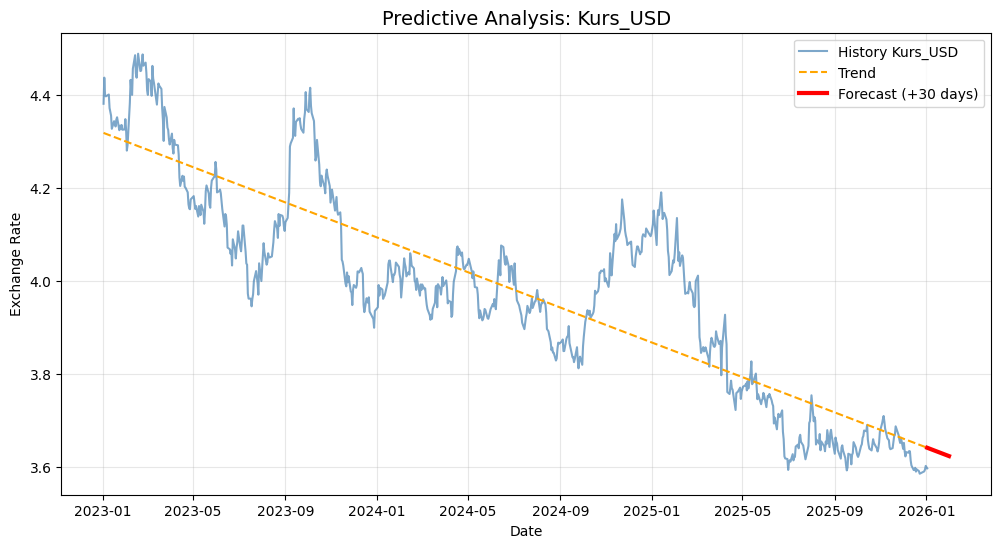

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

dataset = pd.read_excel('Dane Walutowe.xlsx')

target_column = 'Kurs_USD'
days_to_predict = 30

analysis_df = dataset.copy()

analysis_df['Data'] = pd.to_datetime(analysis_df['Data'])
analysis_df = analysis_df.sort_values('Data')
analysis_df = analysis_df.dropna(subset=[target_column])

analysis_df['Numeric_Days'] = (analysis_df['Data'] - analysis_df['Data'].min()).dt.days

coefficients = np.polyfit(analysis_df['Numeric_Days'], analysis_df[target_column], 1)
trend_func = np.poly1d(coefficients)

last_numeric_day = analysis_df['Numeric_Days'].max()
last_date = analysis_df['Data'].max()

future_x = np.arange(last_numeric_day, last_numeric_day + days_to_predict)
forecast_y = trend_func(future_x)
future_dates = [analysis_df['Data'].min() + pd.Timedelta(days=int(d)) for d in future_x]

plt.figure(figsize=(12, 6))
plt.plot(analysis_df['Data'], analysis_df[target_column], label=f'History {target_column}', color='steelblue', alpha=0.7)
plt.plot(analysis_df['Data'], trend_func(analysis_df['Numeric_Days']), color='orange', linestyle='--', label='Trend')
plt.plot(future_dates, forecast_y, color='red', linewidth=3, label=f'Forecast (+{days_to_predict} days)')
plt.title(f'Predictive Analysis: {target_column}', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()